<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Fall 2019<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>

## Lab 4 - Supply Demand Trade
### with welfare effects and interactive sliders

by Eric Van Dusen and Chris Pyles 

In this lab we will seek to combine many of the elements that we have learned in the first 4 labs, to add the equilibrium and welfare effects of a market in equilibrium and one out of equilibrium due to tariffs.   

In [1]:
from utils import *
import numpy as np
import sympy
import matplotlib.pyplot as plt
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
plt.style.use("seaborn-muted")
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### Section 1 - A trade model
To motivate this example we are going to follow along an example from the textbook Principles of Microeconomics by Dr. Emma Hutchinson, University of Victoria.  Specifically an example about US Lumber tariffs.  


https://pressbooks.bccampus.ca/uvicecon103/chapter/4-7-tariffs/

Specifically we will work to recreate the following graph:

<div style="width:image width px; font-size:80%; text-align:center;"><img src="https://pressbooks.bccampus.ca/uvicecon103/wp-content/uploads/sites/58/2016/11/Screen-Shot-2016-12-27-at-9.39.10-AM.png" alt="alternate text" width="500" height="height" style="padding-bottom:0.5em;" /> </div>

### 1.1 Simple Domestic Model

As in previous labs we will begin in `sympy` by declaring variables and equations

In [2]:
Q = sympy.Symbol("Q")

In [3]:
supply = 200 + 20*Q
supply

20*Q + 200

In [4]:
demand = 1800 - 20*Q
demand

1800 - 20*Q

Lets Solve for the domestic equilibrium Quantity (if the US was closed to trade "autarky") ( in millions of board feet) by setting $Q_d=Q_d$


In [5]:
Q_star = solve(demand, supply) # our version of solve is simplified for single solution systems
Q_star

40

In [6]:
# or alternatively
print("The domestic equilibrium quantity of lumber sold is", Q_star, "million board feet")

The domestic equilibrium quantity of lumber sold is 40 million board feet


Lets Solve for the domestic equilibrium Price  ( in Dollars per thousand board feet) by substituting  $Q^* $ into the demand equation)

In [7]:
P_star_d = demand.subs(Q, Q_star)
P_star_d

1000

In [8]:
# or alternatively
print("The domestic equilibrium price of lumber sold is", P_star_d, "$ per bF")

The domestic equilibrium price of lumber sold is 1000 $ per bF


In [9]:
P_star_s = demand.subs(Q, Q_star)
P_star_s

1000

### 1.2 World Price
Now let's introduce international trade and a world price for Lumber

( Suppose a friendly neighboring country had lots of forests and lumber to sell)

In [10]:
World_Price = 400
World_Price

400

How much would the US market Demand at this lower World Price?

In [11]:
QD_FreeTrade = solve(demand, World_Price)
QD_FreeTrade
print("The quantity of lumber demanded at the World Price is", QD_FreeTrade, "million board feet")

The quantity of lumber demanded at the World Price is 70 million board feet


In [12]:
QS_FreeTrade = solve(supply, World_Price)
print("The quantity of lumber sold by domestic producers at the World Price is", QS_FreeTrade, "million board feet")

The quantity of lumber sold by domestic producers at the World Price is 10 million board feet


In [13]:
Imports_FreeTrade = QD_FreeTrade - QS_FreeTrade
print("The quantity of lumber imported at the World Price is", Imports_FreeTrade, "million board feet")

The quantity of lumber imported at the World Price is 60 million board feet


<div style="width:image width px; font-size:80%; text-align:center;"><img src="https://pressbooks.bccampus.ca/uvicecon103/wp-content/uploads/sites/58/2016/11/Screen-Shot-2016-12-27-at-9.39.52-AM.png" alt="alternate text" width="500" height="height" style="padding-bottom:0.5em;" /></div>

### 1.2 Tariffs
Now let's introduce a US tariff on Lumber

( Suppose a president wanted to protect domestic producers of lumber and "save logging jobs")

In [14]:
Tariff = 400
Tariff

400

In [15]:
Protected_Price = World_Price + Tariff
Protected_Price

800

In [16]:
#alternatively
print("The US tariff on imported lumber is", Tariff, "$ per bF")
print("US Consumers will now pay", Protected_Price, "$ per bF")

The US tariff on imported lumber is 400 $ per bF
US Consumers will now pay 800 $ per bF


In [17]:
QD_Protected = solve(demand, Protected_Price)
print("The quantity of lumber demanded at the price with Tariffs is", QD_Protected, "million board feet")

The quantity of lumber demanded at the price with Tariffs is 50 million board feet


In [18]:
QS_Protected = solve(supply, Protected_Price)
print("The quantity of lumber sold by domestic producers at the price with Tariffs is", QS_Protected, "million board feet")

The quantity of lumber sold by domestic producers at the price with Tariffs is 30 million board feet


In [19]:
Imports_Protected = QD_Protected - QS_Protected
Imports_Protected

20

In [20]:
Change_in_Imports = Imports_FreeTrade - Imports_Protected
Change_in_Imports

40

In [21]:
# Alternatively
print("The US will now import just" ,Imports_Protected, "down from", Imports_FreeTrade)
print("This constitutes a reduction in imports of ", Change_in_Imports, "million bF")

The US will now import just 20 down from 60
This constitutes a reduction in imports of  40 million bF


### 2.1 Graphical Solutions
Now let's work on graphing this same solution
In the following section we will define functions to solve these equations

In [22]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)

def plot_intercept_tradeprice (eq, price):
    ex = solve(eq, price)
    why = price
    plt.scatter([ex], [why])
    return (ex, why)


(40, 1000)

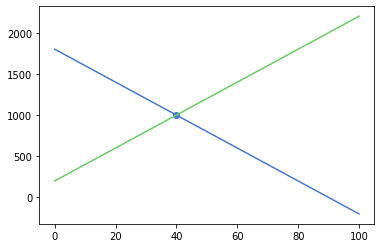

In [23]:
# Simple Equilibrium Graphed
# Here are the basic elements of the Graph
#Demand Curve    
plot_equation(demand, 0, 100)
#Supply Curve
plot_equation(supply, 0, 100)
#Domestic Equilibrium Point
plot_intercept(supply, demand)

(70, 400)

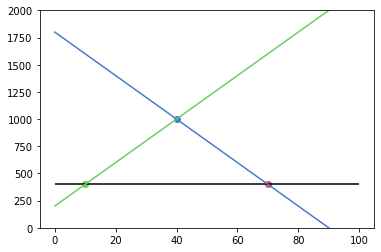

In [24]:

# Equilibrium with World Price and Protected Price

plot_equation(demand, 0, 100)
plot_equation(supply, 0, 100)
plt.hlines(World_Price, 0,100)
plt.ylim(0,2000)
plot_intercept(supply, demand)
plot_intercept_tradeprice(supply,World_Price)
plot_intercept_tradeprice(demand,World_Price)

### 2.2 Labeling the Graphs

These graphs in 2.1 don't quite have enough information in them, lets compare to the textbook table above and add in the information that is missing


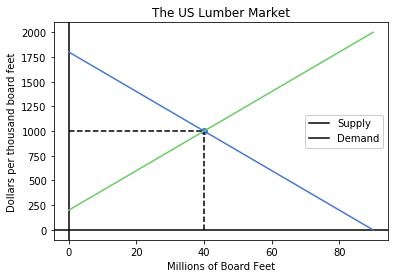

In [25]:
# In order to label the axes - lets make it a combination of plots and axes 
fig, ax = plt.subplots()
# Setting Axes at P=0, Q=0
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

#Demand Curve    
plot_equation(demand, 0, 90)
#Supply Curve
plot_equation(supply, 0, 90)
#Domestic Equilibrium Point
plot_intercept(supply, demand)

# Add a title to the Plot
plt.title("The US Lumber Market");
# Label the axes
plt.xlabel('Millions of Board Feet')
plt.ylabel('Dollars per thousand board feet')
#Legend for the Lines
plt.legend(["Supply", "Demand"], loc=5, framealpha=1)
#Dashed Lines at P_star, Q_star
plt.hlines(P_star_d, 0,Q_star,linestyle="--")
plt.vlines(Q_star, 0,P_star_d,linestyle="--")


## Excercise 1 - Formatting 

Can you format up the following table with title, axes, legends?

(70, 400)

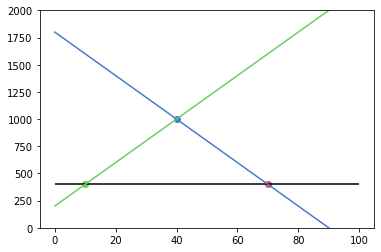

In [26]:
# Equilibrium with World Price and Protected Price

plot_equation(demand, 0, 100)
plot_equation(supply, 0, 100)
plt.hlines(World_Price, 0,100)
plt.ylim(0,2000)
plot_intercept(supply, demand)
plot_intercept_tradeprice(supply,World_Price)
plot_intercept_tradeprice(demand,World_Price)

## Section 3 - adding in an adjustable Tariff



In [27]:
Tariff = widgets.IntSlider(value=400, min=0, max=1000, step=50)
plot = lambda Tariff: plot_1(20, 200, -20, 1800, 400, Tariff)
widgets.interact(plot, Tariff=Tariff);

interactive(children=(IntSlider(value=400, description='Tariff', max=1000, step=50), Output()), _dom_classes=(…